# Airbnb Price Prediction and Customer Churn Prediction | Machine Learning

## Part A: Airbnb Price Prediction and Insights

In [1]:
## Importing Necessary libraries and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings   ## Warnings to overcome any unnecessary error hindering the analysis
warnings.filterwarnings("ignore")

### 📘 Airbnb Data Dictionary

| **Variable**               | **Description**                                                     | **Type**          | **Unit**     |
|-----------------------------|---------------------------------------------------------------------|-----------------|-------------|
| `id`                        | Unique identifier for the listing                                   | String           | -           |
| `log_price`                 | Log-transformed price of the listing                                 | Float            | -           |
| `property_type`             | Type of property (e.g., Apartment, House)                           | String           | -           |
| `room_type`                 | Type of room offered (e.g., Entire home/apt, Private room)          | String           | -           |
| `amenities`                 | List of amenities available at the property                         | String           | -           |
| `accommodates`              | Number of guests the property can accommodate                       | Integer          | People      |
| `bathrooms`                 | Number of bathrooms in the listing                                   | Integer/Float   | -           |
| `bed_type`                  | Type of bed provided (e.g., Real Bed, Futon)                        | String           | -           |
| `cancellation_policy`       | Cancellation policy of the host (e.g., Moderate, Strict)            | String           | -           |
| `cleaning_fee`              | Indicates if a cleaning fee is charged (TRUE/FALSE)                 | Boolean          | -           |
| `city`                      | City where the property is located                                   | String           | -           |
| `description`               | Description of the property provided by the host                    | String           | -           |
| `first_review`              | Date of the first review for the listing                             | Date             | DD-MM-YYYY  |
| `host_has_profile_pic`      | Indicates if the host has a profile picture (t/f)                   | Boolean          | -           |
| `host_identity_verified`    | Indicates if the host's identity is verified (t/f)                  | Boolean          | -           |
| `host_response_rate`        | Host's response rate (e.g., 100%)                                   | String           | Percentage  |
| `host_since`                | Date when the host joined Airbnb                                     | Date             | DD-MM-YYYY  |
| `instant_bookable`          | Indicates if the listing can be booked instantly (t/f)              | Boolean          | -           |
| `last_review`               | Date of the most recent review for the listing                       | Date             | DD-MM-YYYY  |
| `latitude`                  | Latitude coordinate of the listing's location                        | Float            | Degrees     |
| `longitude`                 | Longitude coordinate of the listing's location                       | Float            | Degrees     |
| `name`                      | Name/title of the listing                                            | String           | -           |
| `neighbourhood`             | Neighborhood where the listing is located                            | String           | -           |
| `number_of_reviews`         | Total number of reviews the listing has received                     | Integer          | -           |
| `review_scores_rating`      | Average review score for the listing                                  | Float            | -           |
| `thumbnail_url`             | URL for the thumbnail image of the listing (may be empty)            | String           | -           |
| `zipcode`                   | Zip code of the property's location                                   | String           | -           |
| `bedrooms`                  | Number of bedrooms in the listing                                     | Integer          | -           |
| `beds`                      | Number of beds in the listing                                         | Integer          | -           |


In [3]:
data = pd.read_csv("Airbnb_data - airbnb_data.csv")

In [4]:
data.describe() ## Statistical summary of data

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [4]:
data.isnull().sum() ## Checks for the null values

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
df_filled = data.copy()   ## Creates a copy for the dataset, so the original data is not hampered

##-- Handling null and missing values --##
for col in df_filled.columns:
    if df_filled[col].dtype == object:
        df_filled[col]=df_filled[col].fillna(df_filled[col].mode()[0])
    elif df_filled[col].dtype == bool:
        df_filled[col]=df_filled[col].fillna(False)
    elif df_filled[col].dtype == int:
        df_filled[col]=df_filled[col].fillna(df_filled[col].median())
    elif df_filled[col].dtype == float:
        df_filled[col]=df_filled[col].fillna(df_filled[col].median())

df_filled.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                 96.0   
4                 4                 40.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117      2.0   2.0  
4  https://a0.muscache.com/im/pictures/70087089/b...   20009      0.0   1.0  

[5 rows x 29 columns]

### Plotting necessary diagrams and extracting information

In [9]:
## Creating list of all object-type columns:

obj_cols =[]
for col in df_filled.columns:
    if df_filled[col].dtype == object:
        obj_cols.append(col)

##----Removing Not-required columns-----##
obj_cols.remove('thumbnail_url') 
obj_cols.remove('zipcode')
obj_cols.remove('name')
obj_cols.remove('description')
obj_cols.remove('first_review')
obj_cols.remove('last_review')
obj_cols.remove('host_since')


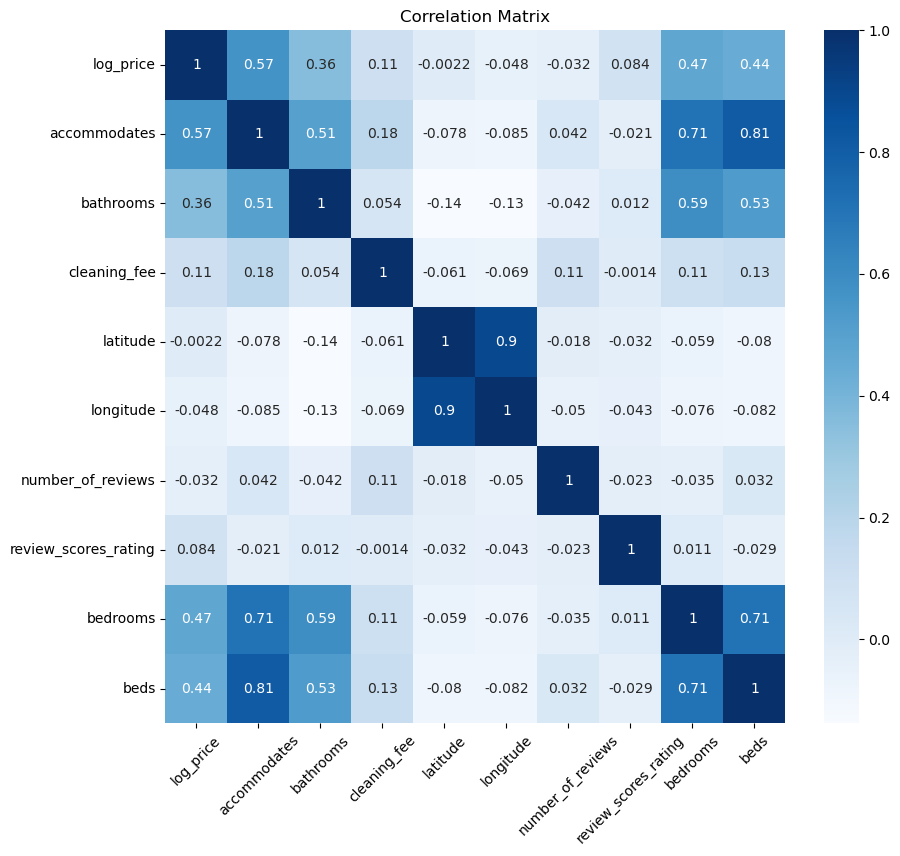

In [7]:
## This creates a list of All numerical Columns
num_cols = []
for i in df_filled.columns:
    if df_filled[i].dtype != object:
        num_cols.append(i)

num_cols.remove("id")   ## Removing "ID" column, not useful in analysis

##------Heatmap to see relationship between numerical columns------##

plt.figure(figsize=(10,9))
sns.heatmap(df_filled[num_cols].corr(),annot=True,fmt=".2g",cmap="Blues")
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
plt.show()

**Findings from the Correlation Matrix: -**
1. Bedrooms and Beds have strong positive correlation.
2. Accommodates have strong positive correlation with bedrooms and beds.
3. Price of the property increases with number of accommodates and vice-versa.

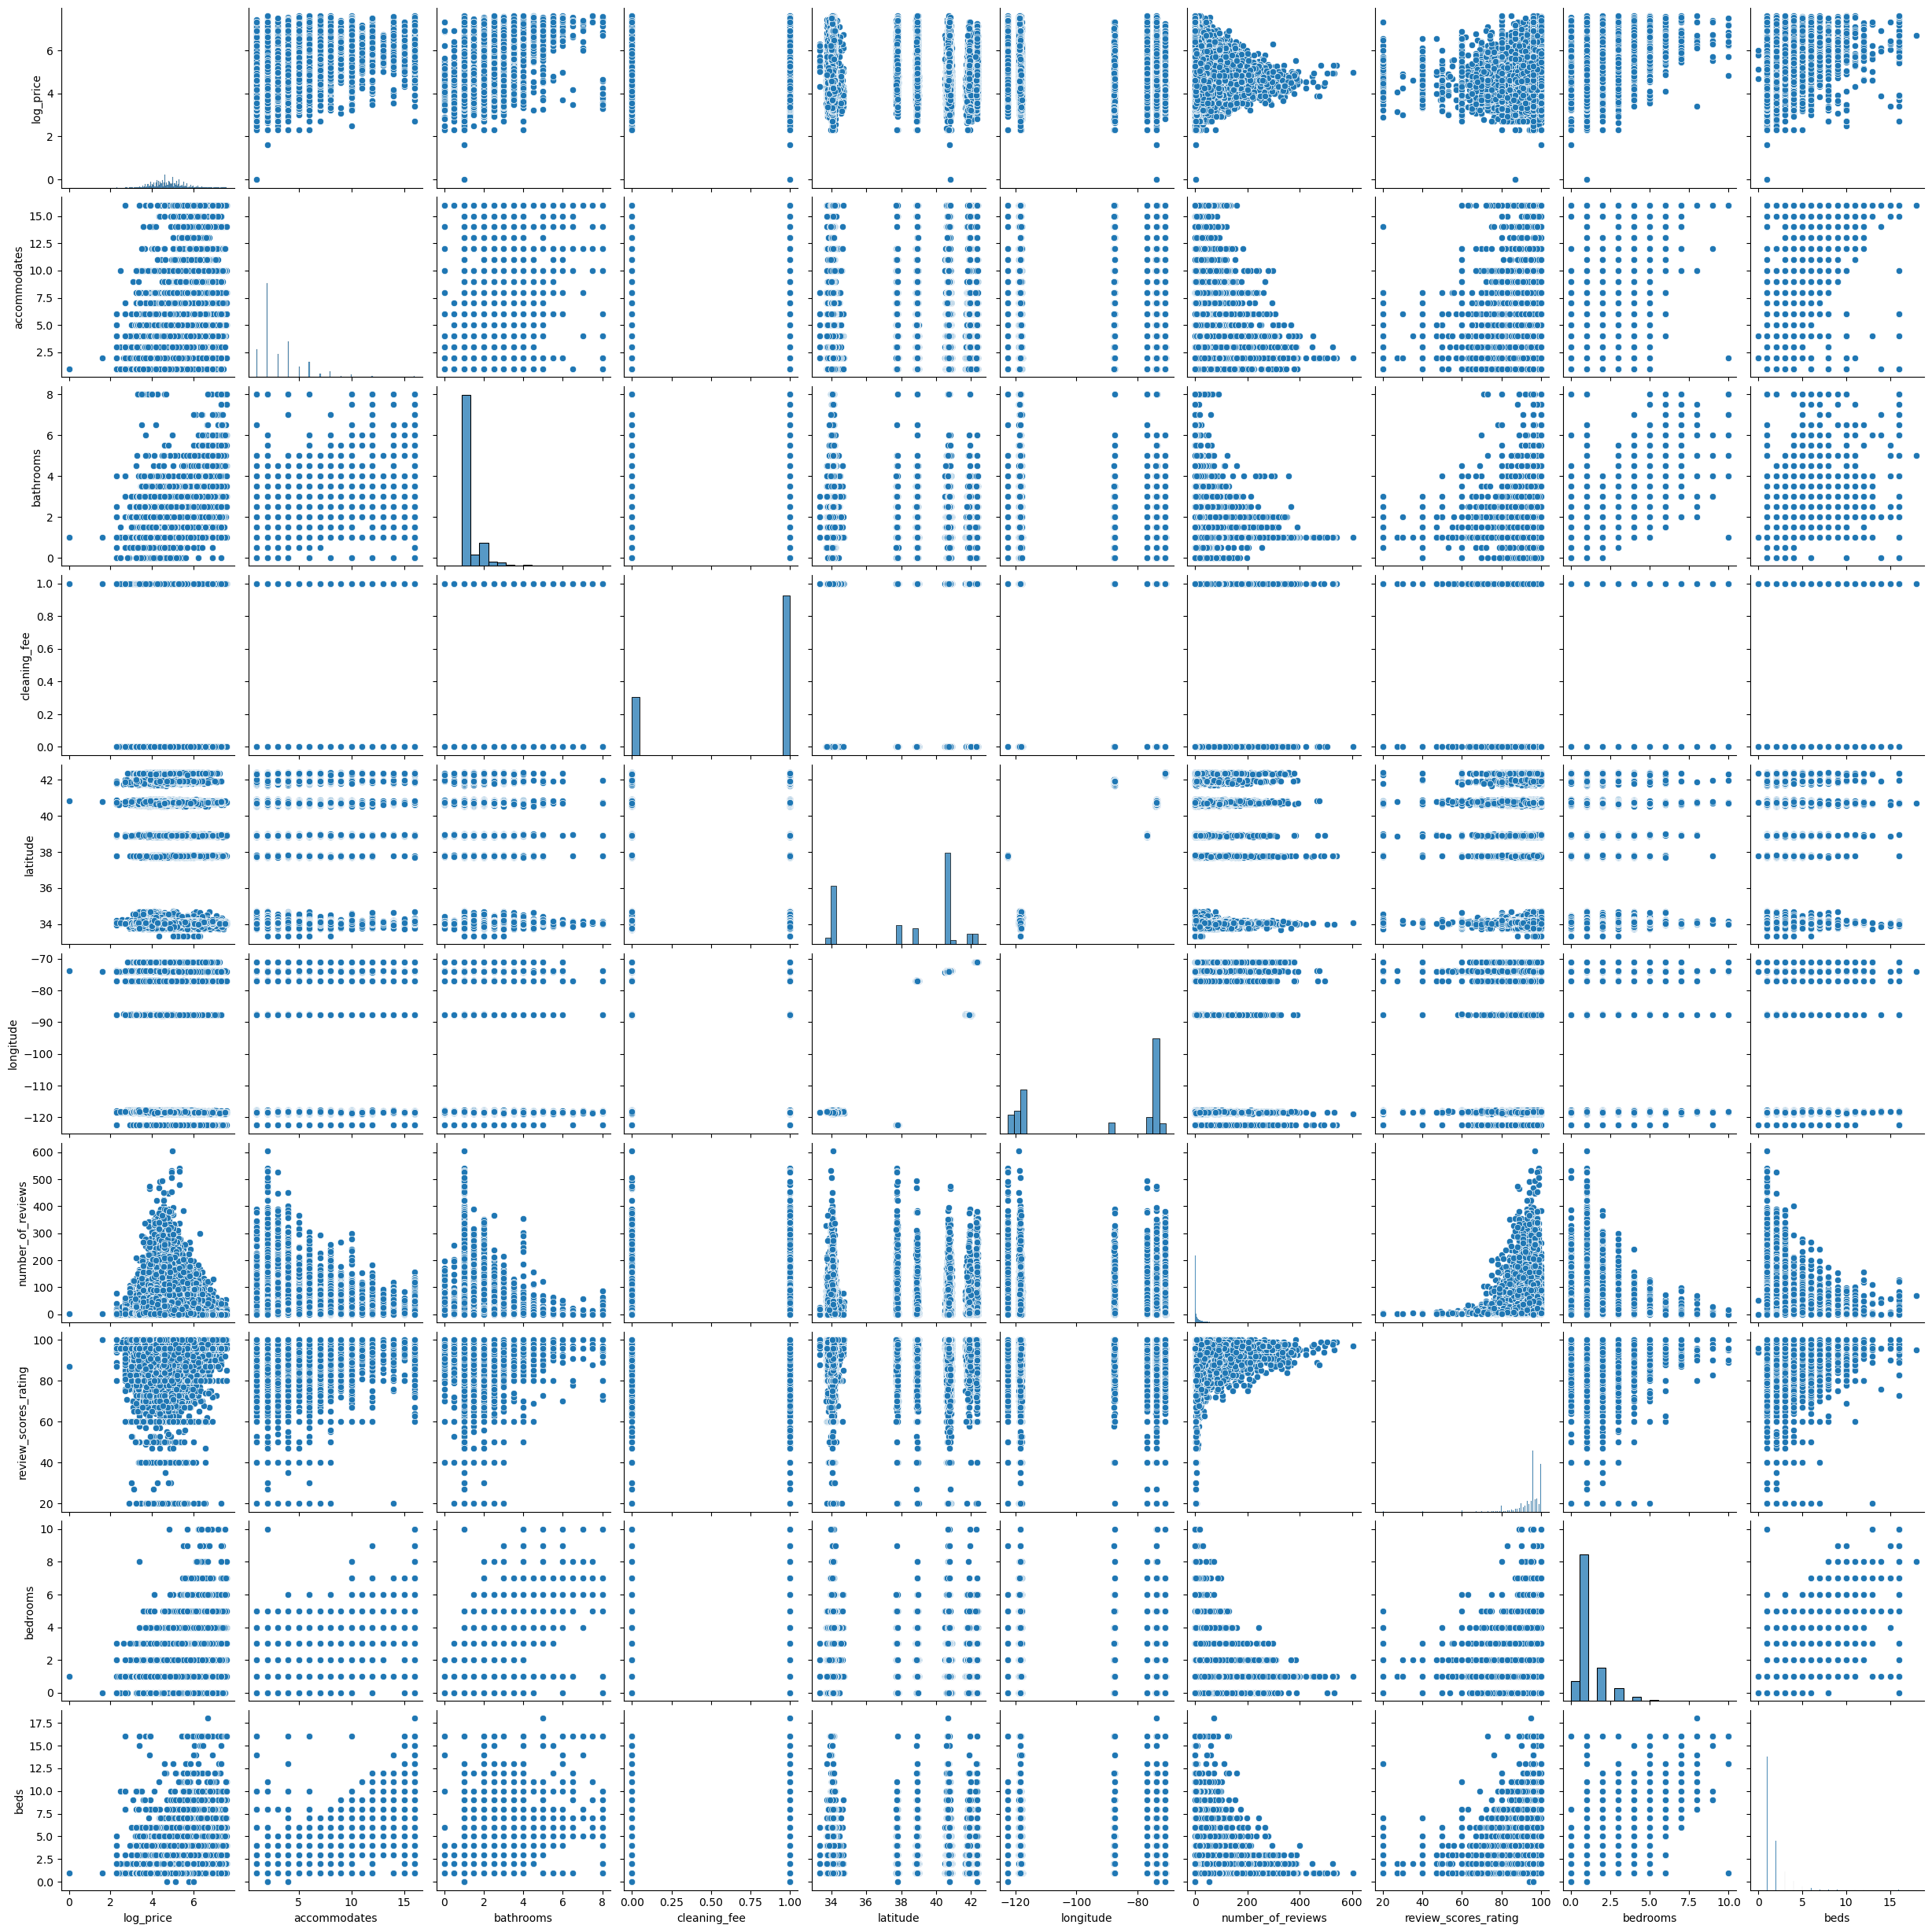

In [8]:
sns.pairplot(df_filled[num_cols])  ## Creates a diagram to explain relation between all the numerical columns
plt.show()

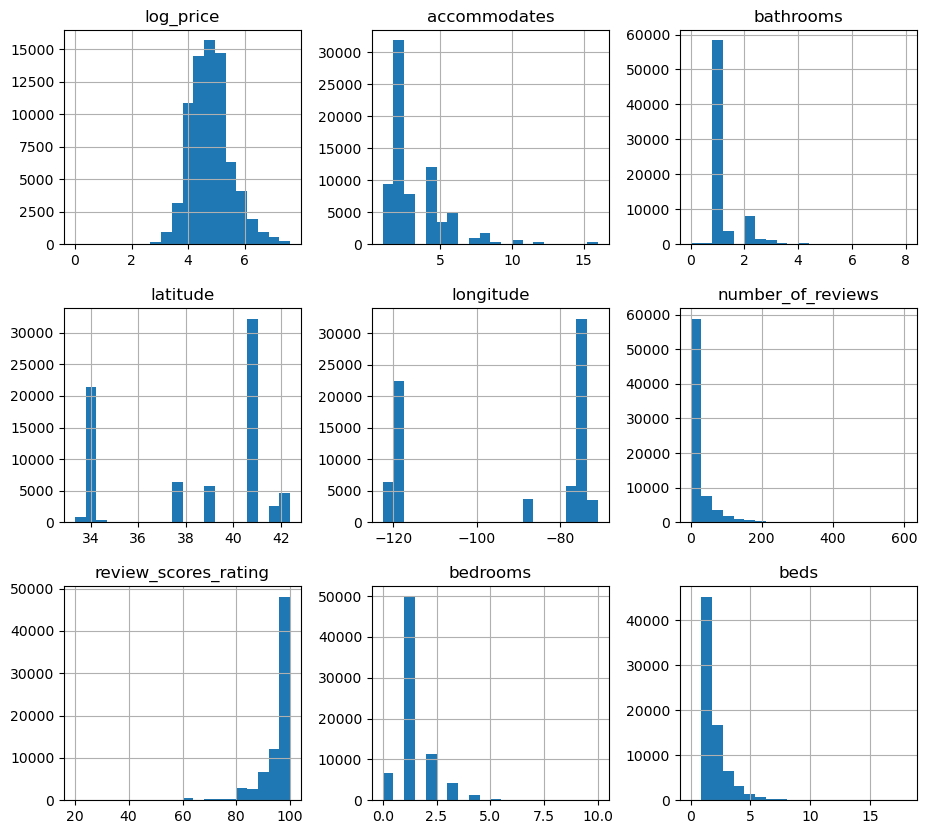

In [10]:
###---Plotting histogram to see distribution of numerical datasets----#

df_filled[num_cols].hist(figsize=(11,10),bins=20)
plt.show()

**Findings from the Histogram**
1. Log_Price can be seen normally distributed.
2. Number of Reviews, Beds and Bedrooms can be seen skewed.

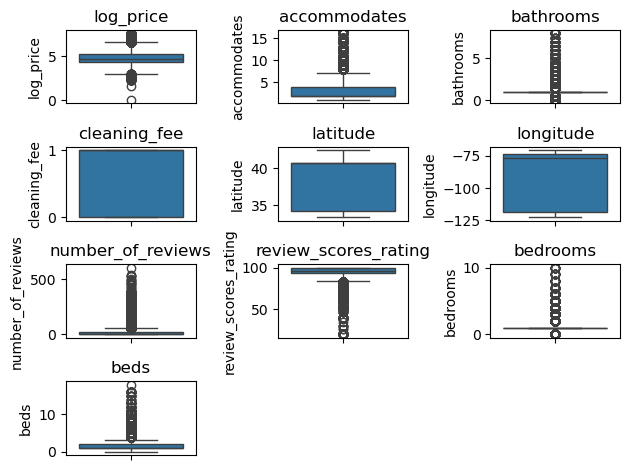

In [11]:
##---Boxplot to see if there is any outlier-----##

for i, column in enumerate(df_filled[num_cols].columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(df_filled[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**There are outliers in multiple columns, that needs to be handled before putting it to the machine**

### Feature Engineering | Scaling and Encoding columns

In [12]:
num_cols.remove("log_price")  ## Removing log_price, as it is already standardized  

##--- Using Standard Scaler class to normalize the data---##
scaler = StandardScaler()
df_scaled_array=scaler.fit_transform(df_filled[num_cols])

##--- Using Label Encoder class to transform categorical columns to respective numericals:----#
labeled_data = {}
for col in obj_cols:
    le=LabelEncoder()
    df_filled[col]=le.fit_transform(df_filled[col]).astype(str)
    labeled_data[col]=le

df_final = pd.concat([df_filled[num_cols],
                      df_filled[obj_cols]],axis=1) ## Combining both numerical and categorical columns after preprocessing


### Model Splitting and Training

In [13]:
X = df_final  ## Assigning all the important features except the log_price
y = df_filled["log_price"]   ## Target or Output Variable

##--Splitting the data for model learning and testing----##
from sklearn.model_selection import train_test_split  

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42) 

##--Assigning class to the model and fitting the data--##
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

### Model Prediction and Evaluation

In [14]:
y_pred = linear_model.predict(X_test)  ## Predicts the test data

##--- Evaluating model performance ---##
from sklearn.metrics import r2_score,mean_absolute_error

print(f"The R2 score is {r2_score(y_test,y_pred)*100:.2f}%")
print(f"The Mean Absolute Error is {mean_absolute_error(y_test,y_pred)}")

The R2 score is 53.69%
The Mean Absolute Error is 0.3669602922128155


**Interpretation of evaluation**
1. The R2 score gives nearly 54% variation in the target variable.
2. Mean Absolute Error is 0.367, which means the average on predictions is off by 0.37 units.
3. Overall the model is having moderate accuracy.

### Plotting the Regression Line (Linear Regression)

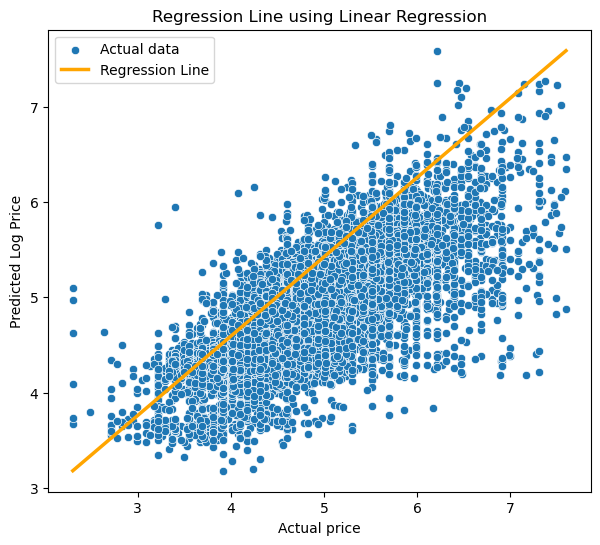

In [17]:
##-- Regression Line plotting of actual data against testing data----##
plt.figure(figsize = (7,6))
sns.scatterplot(x=y_test,y=y_pred,label="Actual data") 
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],
         color="orange",linewidth=2.5,label="Regression Line")
plt.xlabel("Actual price")
plt.ylabel("Predicted Log Price")
plt.title("Regression Line using Linear Regression")
plt.legend()
plt.show()

### Using Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)  ## Assigning class to random forest and setting parameters
rf.fit(X_train,y_train)  ## Fitting data to the model

RandomForestRegressor(random_state=42)

### Prediction and Performance Evaluation

In [18]:
##-- Predicting test variable and evaluating its performance--- ##
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = round(r2_score(y_test, y_pred_rf)*100,2)

print(f"The Mean Absolute Error of RF model is {mae_rf}")
print(f"The R2 score of RF model is {r2_rf}%")

The Mean Absolute Error of RF model is 0.28144475423493687
The R2 score of RF model is 70.23%


**Interpretation**
1. The R2 score gives nearly 70.23% variation in the target variable.
2. Mean Absolute Error is 0.279, which means the average on predictions is off by 0.28 units.
3. Overall the model is having better performance than Linear Regressor.

### Plotting Regression (Random Forest)

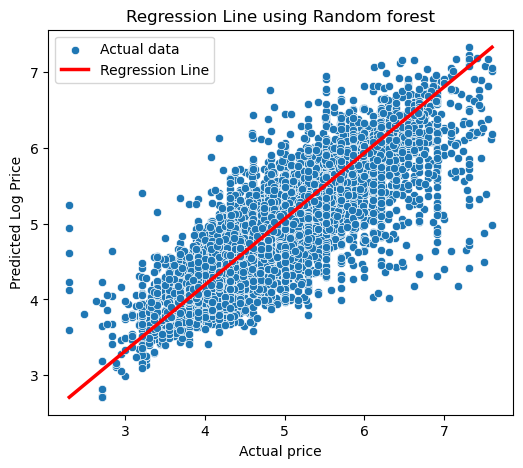

In [20]:
##--- Plots Regression Line of Actual values against Predicted Values
plt.figure(figsize = (6,5)) 
sns.scatterplot(x=y_test,y=y_pred_rf,label="Actual data")
plt.plot([y_test.min(),y_test.max()],[y_pred_rf.min(),y_pred_rf.max()],
         color="red",linewidth=2.5,label="Regression Line")
plt.xlabel("Actual price")
plt.ylabel("Predicted Log Price")
plt.title("Regression Line using Random forest")
plt.legend()
plt.show()

### Model Tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV  ## Takes random parameters out of all, and iterates for fixed times.
rf_regressor_grid ={'n_estimators': [100, 200, 300, 400, 500],
                    'max_depth': [10, 20, 30, 40, 50, None],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]}   ## Dictionary for testing the parameters

rf_random_search = RandomizedSearchCV(RandomForestRegressor(),rf_regressor_grid,random_state=42,
                                      n_jobs=1,n_iter=3,scoring="r2") 
rf_random_search.fit(X_train,y_train)
print(rf_random_search.best_score_)  ## Prints the best score
print(rf_random_search.best_params_) ## Prints the best parameters

0.6999016204120029
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}


**The model doesn't show any sizeable changes after tuning**.

### Model Consumption for users

In [216]:
def get_house_price():   ## Defining function

    ##-- Giving input statement for all the features to predict the price ---##
    
    accommodates = float(input("Number of guests the property can accommodate: "))
    bathrooms = float(input("Number of bathrooms: "))
    cleaning_fee = input("Is cleaning fee charged? (True/False): ").strip().lower() == 'true'
    latitude = float(input("Latitude: "))
    longitude = float(input("Longitude: "))
    number_of_reviews = float(input("Number of reviews: "))
    review_scores_rating = float(input("Review scores rating: "))
    bedrooms = float(input("Number of bedrooms: "))
    beds = float(input("Number of beds: "))

    property_type = input("Property type (e.g., Apartment, House): ")
    room_type = input("Room type (e.g., Entire home/apt, Private room): ")
    amenities = input("Amenities (comma separated): ")
    bed_type = input("Bed type (e.g., Real Bed, Futon): ")
    cancellation_policy = input("Cancellation policy (e.g., Moderate, Strict): ")
    city = input("City: ")
    host_has_profile_pic = input("Host has profile picture? (True/False): ").strip().lower() == 'true'
    host_identity_verified = input("Host identity verified? (True/False): ").strip().lower() == 'true'
    host_response_rate = float(input("Host response rate (e.g., 95%): ").strip('%'))
    instant_bookable = input("Instant bookable? (True/False): ").strip().lower() == 'true'
    neighbourhood = input("Neighbourhood: ")

    listing_input = {                      ## Creating a dictionary of user inputs
        'accommodates': accommodates,
        'bathrooms': bathrooms,
        'cleaning_fee': cleaning_fee,
        'latitude': latitude,
        'longitude': longitude,
        'number_of_reviews': number_of_reviews,
        'review_scores_rating': review_scores_rating,
        'bedrooms': bedrooms,
        'beds': beds,
        'property_type': property_type,
        'room_type': room_type,
        'amenities': amenities,
        'bed_type': bed_type,
        'cancellation_policy': cancellation_policy,
        'city': city,
        'host_has_profile_pic': host_has_profile_pic,
        'host_identity_verified': host_identity_verified,
        'host_response_rate': host_response_rate,
        'instant_bookable': instant_bookable,
        'neighbourhood': neighbourhood}

    input_df = pd.DataFrame([listing_input])  ## Converting the dictionary to a DataFrame

    ##-- Encoding the user input to feed data accordingly used in training the machine ---##
    for col in obj_cols:

        ## Handles if there is any unknown input by the user
        input_df[col] = input_df[col].apply(lambda x: x if x in labeled_data[col].classes_ 
                                        else labeled_data[col].classes_[0]) 
        
        input_df[col] = labeled_data[col].transform(input_df[col]) ## Encodes the data accordingly

    ## Scaling the numerical inputs by the user
    input_df[num_cols] = scaler.transform(input_df[num_cols])

    predicted_price = rf.predict(input_df) ## Predicts the price based on input
    print(f"The predicted price of the property is: {np.exp(predicted_price)}")  ## Displays the Actual Price Prediction

get_house_price()

Number of guests the property can accommodate:  51
Number of bathrooms:  2
Is cleaning fee charged? (True/False):  True
Latitude:  71
Longitude:  -41
Number of reviews:  25
Review scores rating:  88
Number of bedrooms:  2
Number of beds:  2
Property type (e.g., Apartment, House):  
Room type (e.g., Entire home/apt, Private room):  
Amenities (comma separated):  
Bed type (e.g., Real Bed, Futon):  Futon
Cancellation policy (e.g., Moderate, Strict):  Strict
City:  LA
Host has profile picture? (True/False):  True
Host identity verified? (True/False):  True
Host response rate (e.g., 95%):  77%
Instant bookable? (True/False):  True
Neighbourhood:  


The predicted price of the property is: [166.65433443]


### Conclusion | Part A
-The Random Forest model does a better job of predicting property prices than a simple linear approach, capturing about 71% of the key factors that influence prices.

-Property prices don’t follow a simple straight-line pattern with the features were measured, which is why more flexible models like Random Forest perform better.

-The number of bedrooms, beds, and maximum guest capacity are the most important factors determining **property prices**.

-Some extreme values in the dataset may affect predictions, so results should be interpreted with that in mind.

**Implication:**

-Using this model can help make more accurate pricing decisions and identify which property features have the biggest impact on value.

## Video Link ##
https://drive.google.com/file/d/15RK56Rr_c4x6njIcyqp6bDlmQIHsutCE/view?usp=sharing

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Part B: Customer Churn Prediction

### Data Dictionary

| **Variable**       | **Description**                                                      | **Type** | **Unit** |
| ------------------ | -------------------------------------------------------------------- | -------- | -------- |
| `customerID`       | Unique ID for the customer                                           | String   | -        |
| `gender`           | Gender of the customer                                               | String   | -        |
| `SeniorCitizen`    | Whether the customer is a senior citizen (`0`: No, `1`: Yes)         | Binary   | -        |
| `Partner`          | Whether the customer has a partner (`Yes`/`No`)                      | String   | -        |
| `Dependents`       | Whether the customer has dependents (`Yes`/`No`)                     | String   | -        |
| `tenure`           | Number of months the customer has stayed with the company            | Integer  | Months   |
| `PhoneService`     | Whether the customer has phone service (`Yes`/`No`)                  | String   | -        |
| `MultipleLines`    | Whether the customer has multiple lines (`Yes`/`No`)                 | String   | -        |
| `InternetService`  | Customer’s internet service provider (`DSL`, `Fiber optic`, `No`)    | String   | -        |
| `OnlineSecurity`   | Whether the customer has online security add-on (`Yes`/`No`)         | String   | -        |
| `OnlineBackup`     | Whether the customer has online backup add-on (`Yes`/`No`)           | String   | -        |
| `DeviceProtection` | Whether the customer has device protection add-on (`Yes`/`No`)       | String   | -        |
| `TechSupport`      | Whether the customer has tech support add-on (`Yes`/`No`)            | String   | -        |
| `StreamingTV`      | Whether the customer has streaming TV add-on (`Yes`/`No`)            | String   | -        |
| `StreamingMovies`  | Whether the customer has streaming movies add-on (`Yes`/`No`)        | String   | -        |
| `Contract`         | Type of contract (`Month-to-month`, `One year`, `Two year`)          | String   | -        |
| `PaperlessBilling` | Whether the customer uses paperless billing (`Yes`/`No`)             | String   | -        |
| `PaymentMethod`    | Customer’s payment method (`Electronic check`, `Mailed check`, etc.) | String   | -        |
| `MonthlyCharges`   | Amount charged to the customer monthly                               | Float    | USD      |
| `TotalCharges`     | Total amount charged to the customer                                 | Float    | USD      |
| `Churn`            | Whether the customer churned (`Yes`/`No`)                            | String   | -        |


In [6]:
df = pd.read_csv("Customer_data - customer_data.csv") ## Reads the file using pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
df.describe()  ## Stastical Summary of the dataset

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [219]:
df.isnull().sum()  ## Checks for any null values.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
##-- Handling Missing Values-- ##
df_filled = df.copy() ## Creates a copy of original dataset 
df_filled["TotalCharges"] = df_filled["TotalCharges"].fillna(df_filled["TotalCharges"].median()) ## Fill the null values.

### Feature Engineering and Plotting necessary visuals

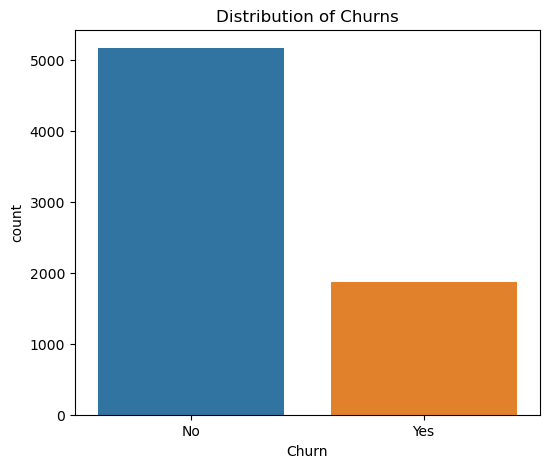

In [8]:
##-- Visualises the distribution of Churn in Dataset --##
plt.figure(figsize=(6,5))
sns.countplot(x="Churn",data = df_filled, hue = "Churn")
plt.title("Distribution of Churns")
plt.show()

**The number of 'not churns' is more than number of 'churns'**

In [9]:
df_filled = df_filled.drop(columns = "customerID") ## Drops "ID" column, not required in analysis
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
num_columns = []  ## Empty list for all numerical columns
obj_cols = []   ## Empty list for all categorical columns

##-- Loop to add columns to repective list --##
for col in df_filled.columns:
    if df_filled[col].dtype == object:
        obj_cols.append(col)
    else:
        num_columns.append(col)

num_columns.remove("SeniorCitizen")  ## This column is already in binary format

In [11]:
label_encoded = {}  ## Storing all the encoded variables

##-- Encoding each categorical Variables --##
for i in obj_cols:
    le = LabelEncoder()
    df_filled[i] = le.fit_transform(df_filled[i]).astype(str)
    label_encoded[i] = le

df_finalled = pd.concat([df_filled[num_columns],df_filled[obj_cols]],axis=1) ## Combines both numerical and categorical columns

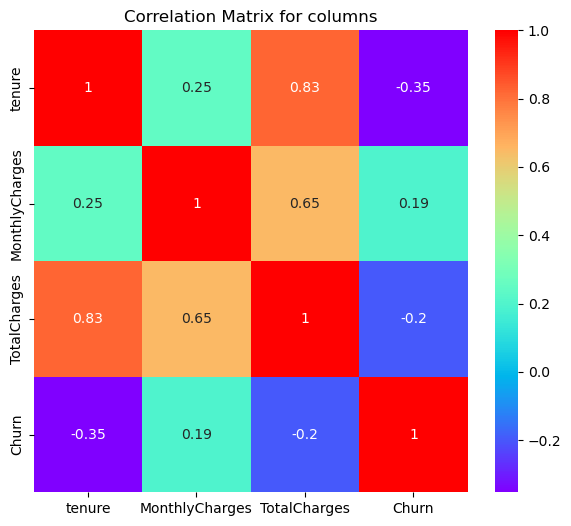

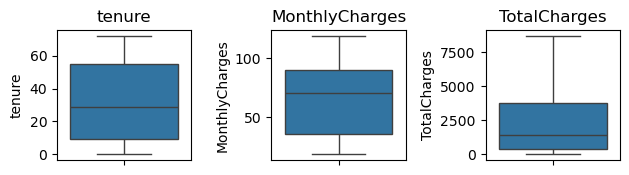

In [12]:
##-- Correlation Matrix to plot relationship between columns --##
plt.figure(figsize = (7,6))
sns.heatmap(df_filled[["tenure","MonthlyCharges","TotalCharges","Churn"]].corr(), annot =True, fmt = ".2g",cmap="rainbow")
plt.xticks(rotation=0)
plt.title("Correlation Matrix for columns")
plt.show()

##-- Boxplot to check if there is any outlier --##
for i,cols in enumerate(num_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_filled[cols])
    plt.title(cols)
plt.tight_layout()
plt.show()

**Findings**
1. There is no strong relationship between Churn and other columns.
2. Total Charges and Tenure shows a strong positive correlation.

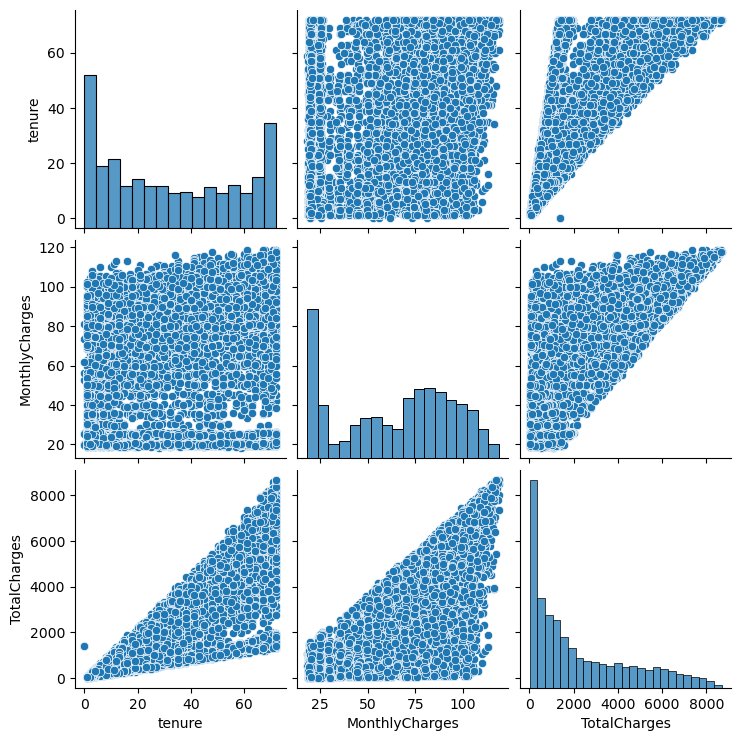

In [13]:
sns.pairplot(df_filled[num_columns]) ## Plots pair diagram to visualise the relationship between numerical columns
plt.show()

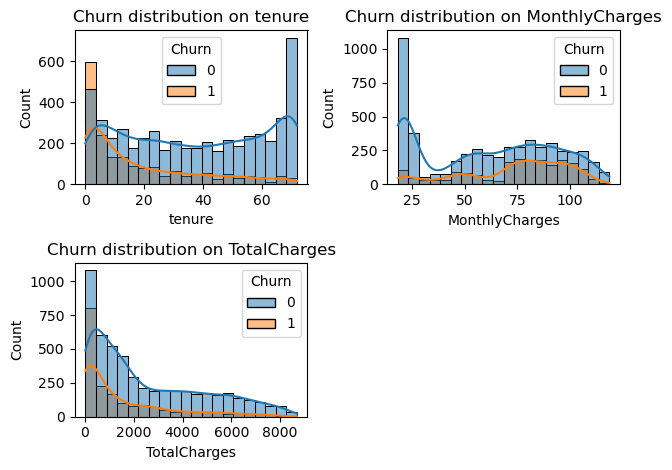

In [14]:
##-- Histogram to see the data distribution --##
for i,column in enumerate(df_filled[num_columns]):
    plt.subplot(2,2,i+1)
    sns.histplot(x=column,data=df_filled,kde=True,hue="Churn",bins=20)
    plt.title(f"Churn distribution on {column}")
plt.tight_layout()
plt.show()

**The distribution of Churn among all numerical columns is skewed.**

### Model Training

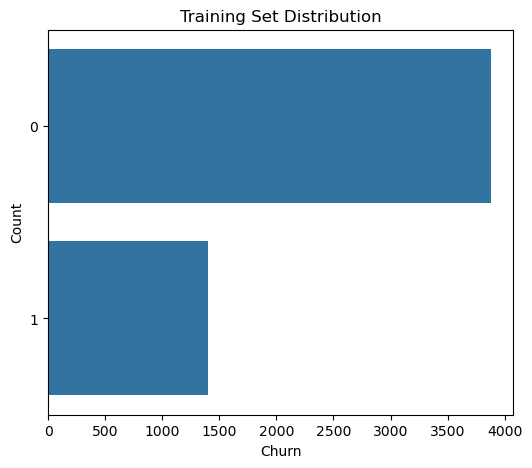

In [19]:
X = df_filled.drop(columns = "Churn")  ## Drops the Target Variable
y = df_filled["Churn"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify = y) ## Splits the data 

##-- Scaling the training data to reduce noise --##
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##-- Checks the class distribution in training data-- ##
plt.figure(figsize=(6,5))
sns.countplot(y_train)
plt.title("Training Set Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced') ## Assigning model to an object
lr.fit(X_train,y_train) ## Fitting data to the model

LogisticRegression(class_weight='balanced')

### Model Prediction and Evaluation

In [21]:
lr_pred = lr.predict(X_test)  ## Predicts the target variable

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  ## Importing necessary Evaluation Metrics

##-- Calculating and printing model perfomance --##
lr_accuracy_score = accuracy_score(y_test,lr_pred)
lr_classification_report = classification_report(y_test,lr_pred)
lr_confusion_matrix = confusion_matrix(y_test,lr_pred)

print(f"The Accuracy Score of Logistic Regression Model is: {lr_accuracy_score*100:.2f}%")

print(f"\nThe Classification Report of Logistic Regression Model is:\n{lr_classification_report}")

The Accuracy Score of Logistic Regression Model is: 74.73%

The Classification Report of Logistic Regression Model is:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1294
           1       0.52      0.80      0.63       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.81      0.75      0.76      1761



### Confusion Matrix of Logistic Regression Model

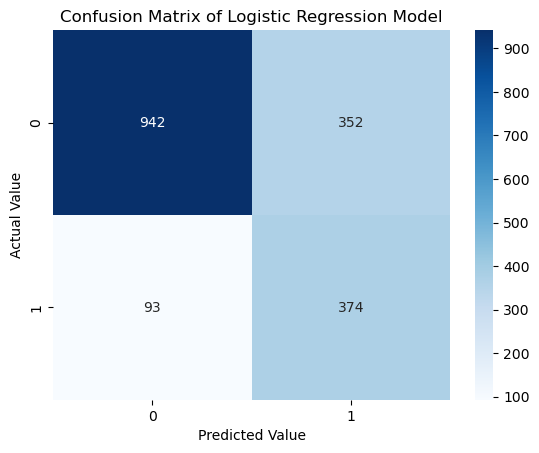

In [22]:
sns.heatmap(lr_confusion_matrix,cmap = "Blues",annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.xticks(rotation=0)
plt.ylabel("Actual Value")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

**Findings**
1. The Logistic Regression model gives moderate overall accuracy (~75%).
2. It captures most of the positive cases (80%), which means it’s good at identifying true “Yes” outcomes.
3. However, it also produces some false alerts (~35% of positive predictions), so fine-tuning could improve reliability.

### Using RandomForest Classifier

In [232]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [233]:
rf_pred = rf.predict(X_test)  ## Predicting the output variable

##-- Evaluating and Printing Model Performance
rf_accuracy_score = accuracy_score(y_test,rf_pred)
rf_classification_report = classification_report(y_test,rf_pred)
rf_confusion_matrix = confusion_matrix(y_test,lr_pred)

print(f"The Accuracy Score of Random Forest Model is: {rf_accuracy_score*100:.2f}%")

print(f"\nThe Classification Report of Random Forest Model is:\n{rf_classification_report}")

The Accuracy Score of Random Forest Model is: 79.05%

The Classification Report of Random Forest Model is:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.64      0.47      0.55       467

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761



### Handling Imbalance Data

In [234]:
from imblearn.over_sampling import SMOTE ## Used to Create Synthetic records for balancing records

In [235]:
y_train.value_counts() ## Checks the class distibution in training model

Churn
0    3880
1    1402
Name: count, dtype: int64

**The training data is imbalanced, that can affect recall score of the model**

In [236]:
sm = SMOTE(random_state=42) ## Assigning object to SMOTE class

X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)  ## Transforms train and test data by introducing synthetic records

In [237]:
y_train_sm.value_counts() ## After SMOTE, checks class distribution

Churn
0    3880
1    3880
Name: count, dtype: int64

In [238]:
rf.fit(X_train_sm,y_train_sm) ## Fitting data after transformation
rf_pred_sm = rf.predict(X_test)

In [239]:
##--- Evaluating performance and printing transformed accuracy ---##

rf_accuracy_score_sm = accuracy_score(y_test,rf_pred_sm)
rf_classification_report_sm = classification_report(y_test,rf_pred_sm)
rf_confusion_matrix_sm = confusion_matrix(y_test,rf_pred_sm)

print(f"The Accuracy Score of Random Forest Model is: {rf_accuracy_score_sm*100:.2f}%")

print(f"\nThe Classification Report of Random Forest Model is:\n{rf_classification_report_sm}")

The Accuracy Score of Random Forest Model is: 77.91%

The Classification Report of Random Forest Model is:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1294
           1       0.58      0.59      0.59       467

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761



**Findings**

The Random Forest model provides good overall accuracy (≈78%) and is reliable for predicting non-churn cases, but needs improvement in detecting positive cases (customers likely to churn or target events).

### Model Tuning

In [175]:
rf_grid = {
    'n_estimators': [100, 200, 250],  
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]}  ## Creates a grid of parameters

from sklearn.model_selection import GridSearchCV  ## For Grid selection

rf_grid_search = GridSearchCV(RandomForestClassifier(),rf_grid,cv=5,scoring="accuracy",n_jobs=1)

rf_grid_search.fit(X_train_sm,y_train_sm) ## Fitting the data to the model

rf_best_score = rf_grid_search.best_score_  ## The best score of all the combinations

rf_best_param = rf_grid_search.best_params_ ## The best parameters of all the combinations

In [179]:
print(rf_best_score)
print(rf_best_param)

0.8518041237113403
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


In [180]:
rf_best = RandomForestClassifier(**rf_best_param) ## Using the best parameter suggested by GridSearch
rf_best.fit(X_train_sm,y_train_sm) 

RandomForestClassifier(n_estimators=250)

In [181]:
##-- Model Performance and Evaluation after tuning --##
rf_best_pred = rf_best.predict(X_test)
rf_best_accuracy_score = accuracy_score(y_test,rf_best_pred)
rf_best_classification_report = classification_report(y_test,rf_best_pred)
rf_best_confusion_matrix = confusion_matrix(y_test,rf_best_pred)

print(f"The Accuracy Score of Random Forest after Tuning Model is: {rf_best_accuracy_score*100:.2f}%")

print(f"\nThe Classification Report of Random Forest after Tuning Model is:\n{rf_best_classification_report}")


The Accuracy Score of Random Forest after Tuning Model is: 78.53%

The Classification Report of Random Forest after Tuning Model is:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1294
           1       0.59      0.60      0.60       467

    accuracy                           0.79      1761
   macro avg       0.72      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761



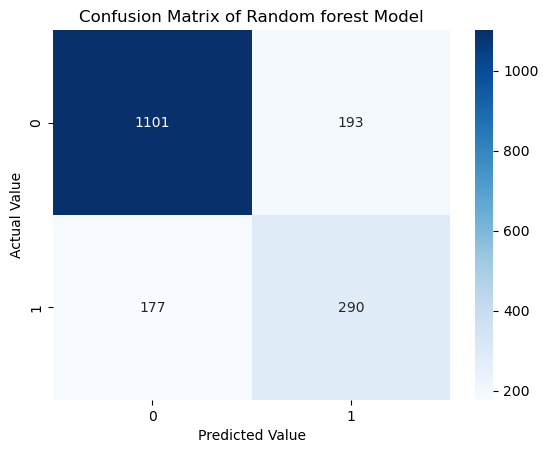

In [120]:
##-- Correlation Matrix for Random Forest after best parameters --##
sns.heatmap(rf_best_confusion_matrix,cmap = "Blues",annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.xticks(rotation=0)
plt.ylabel("Actual Value")
plt.title("Confusion Matrix of Random forest Model")
plt.show()

**Findings**

After tuning, the Random Forest model achieves 78.5% accuracy and shows improved, stable performance.
It is dependable for predicting non-target outcomes, and reasonably effective at identifying target cases, making it suitable for practical decision-making.

### Model Consumption

In [240]:

def get_customer_prediction(): ## Creating function to take inputs from the user
    
    print("\n--- Enter Customer Details ---")

    # Take inputs from user
    gender = input("Gender (Male/Female): ")
    SeniorCitizen = int(input("Senior Citizen (0 = No, 1 = Yes): "))
    Partner = input("Partner (Yes/No): ")
    Dependents = input("Dependents (Yes/No): ")
    tenure = float(input("Tenure (in months): "))
    PhoneService = input("Phone Service (Yes/No): ")
    MultipleLines = input("Multiple Lines (Yes/No): ")
    InternetService = input("Internet Service (DSL/Fiber optic/No): ")
    OnlineSecurity = input("Online Security (Yes/No): ")
    OnlineBackup = input("Online Backup (Yes/No): ")
    DeviceProtection = input("Device Protection (Yes/No): ")
    TechSupport = input("Tech Support (Yes/No): ")
    StreamingTV = input("Streaming TV (Yes/No): ")
    StreamingMovies = input("Streaming Movies (Yes/No): ")
    Contract = input("Contract (Month-to-month/One year/Two year): ")
    PaperlessBilling = input("Paperless Billing (Yes/No): ")
    PaymentMethod = input("Payment Method (Electronic check/Mailed check/Bank transfer/Credit card): ")
    MonthlyCharges = float(input("Monthly Charges (USD): "))
    TotalCharges = float(input("Total Charges (USD): "))

    # Create dictionary for model input
    customer_data = {
        'gender': gender,
        'SeniorCitizen': SeniorCitizen,
        'Partner': Partner,
        'Dependents': Dependents,
        'tenure': tenure,
        'PhoneService': PhoneService,
        'MultipleLines': MultipleLines,
        'InternetService': InternetService,
        'OnlineSecurity': OnlineSecurity,
        'OnlineBackup': OnlineBackup,
        'DeviceProtection': DeviceProtection,
        'TechSupport': TechSupport,
        'StreamingTV': StreamingTV,
        'StreamingMovies': StreamingMovies,
        'Contract': Contract,
        'PaperlessBilling': PaperlessBilling,
        'PaymentMethod': PaymentMethod,
        'MonthlyCharges': MonthlyCharges,
        'TotalCharges': TotalCharges
    }

    inputed_df = pd.DataFrame([customer_data]) ## Converting user inputs to a dataFrame

    ## -- Encoding the inputs accordingly as used in training --##
    for col, le in label_encoded.items():
        if col in inputed_df.columns:
            try:
                inputed_df[col] = le.transform(inputed_df[col])  ## Goes if the condition is satisfied
            
            ##-- Handling untrained entries --##
            except ValueError:
                inputed_df[col] = inputed_df[col].apply(lambda x: le.transform([le.classes_[0]])[0])

    
    prediction = lr.predict(inputed_df)[0] ## Predicts based on user inputs
    probability = lr.predict_proba(inputed_df)[0,1] ## Probability that the input belongs to class 1.

    # Output result
    if prediction == 1:
        print(f"\nPrediction: Customer is likely to CHURN (Probability = {probability:.2f})")
    else:
        print(f"\nPrediction: Customer is NOT likely to churn (Probability = {probability:.2f})")

get_customer_prediction() ## Calling the function


--- Enter Customer Details ---


Gender (Male/Female):  Male
Senior Citizen (0 = No, 1 = Yes):  0
Partner (Yes/No):  Yes
Dependents (Yes/No):  Yes
Tenure (in months):  7
Phone Service (Yes/No):  No
Multiple Lines (Yes/No):  No
Internet Service (DSL/Fiber optic/No):  No
Online Security (Yes/No):  Yes
Online Backup (Yes/No):  Yes
Device Protection (Yes/No):  No
Tech Support (Yes/No):  Yes
Streaming TV (Yes/No):  Yes
Streaming Movies (Yes/No):  NO
Contract (Month-to-month/One year/Two year):  Two year
Paperless Billing (Yes/No):  No
Payment Method (Electronic check/Mailed check/Bank transfer/Credit card):  Credit Card
Monthly Charges (USD):  134
Total Charges (USD):  444



Prediction: Customer is NOT likely to churn (Probability = 1.00)


## Conclusion | Part B

-The analysis shows that the Logistic Regression model is effective in predicting customer churn. It correctly identifies most customers who are likely to leave, making it a reliable tool for targeting retention efforts.

-Overall, the model performs moderately well, with an accuracy of around 75%.

-The customers who have been with us longer tend to have higher total charges, while churn is slightly more common among customers with shorter tenures.

**Implication:**

-By focusing on customers at risk of leaving, we can take proactive steps to improve retention and increase overall revenue.

## Video Link ##
https://drive.google.com/file/d/1h8Ude3araEJlXizU18HHLTgVy-Ukpme2/view?usp=sharing